# Chroma features extraction

https://github.com/albincorreya/ChromaCoverId/ is a package that offers methods to extract chroma features of audio samples and calculate distanced between them. The distance metric - Qmax - proposed by Serra et al. [1] is tempo and melody variation independent.

[1]. Serra, J., Serra, X., & Andrzejak, R. G. (2009). Cross recurrence quantification for cover song identification.New Journal of Physics.

### Example chroma features visualizations and distance calculation

In [2]:
from ChromaCoverId.chroma_features import ChromaFeatures
from ChromaCoverId.chroma_features import display_chroma
import ChromaCoverId.cover_similarity_measures as sims
import matplotlib.pyplot as plt

In [54]:
import IPython

audio1_path = "koledy/samples/a_wczora_z_wieczora_24_1.wav" 
audio2_path = "koledy/samples/a_wczora_z_wieczora_48_1.wav"

IPython.display.Audio(audio1_path)

In [55]:
IPython.display.Audio(audio2_path)

In [56]:
# Initiate the ChromaFeatures class 
audio1 = ChromaFeatures(audio_file=audio1_path, mono=True, sample_rate=44100) 
audio2 = ChromaFeatures(audio_file=audio2_path, mono=True, sample_rate=44100) 

# if not specified the class is initiated with default params
#chroma = ChromaFeatures(audio_path)

== Audio vector of koledy/samples/a_wczora_z_wieczora_24_1.wav loaded with shape (441000,) and sample rate 44100 ==
== Audio vector of koledy/samples/a_wczora_z_wieczora_48_1.wav loaded with shape (441000,) and sample rate 44100 ==


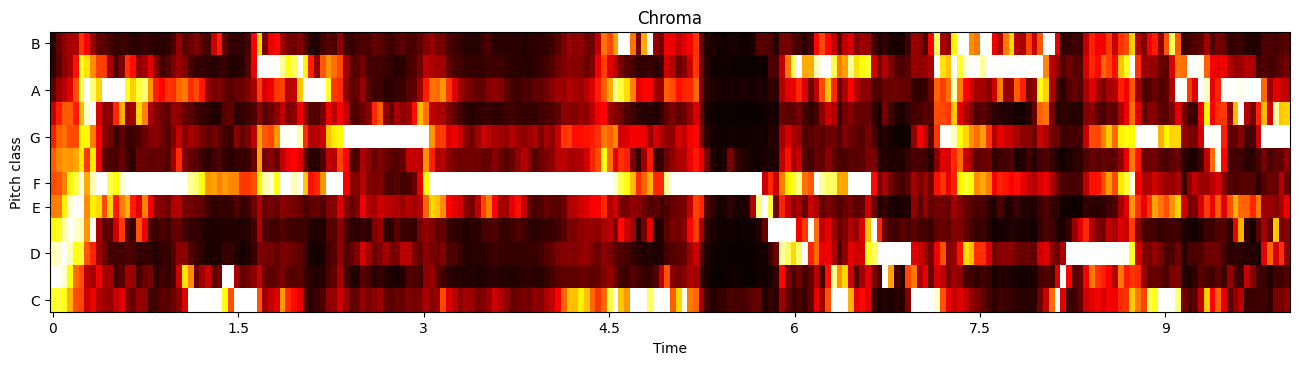

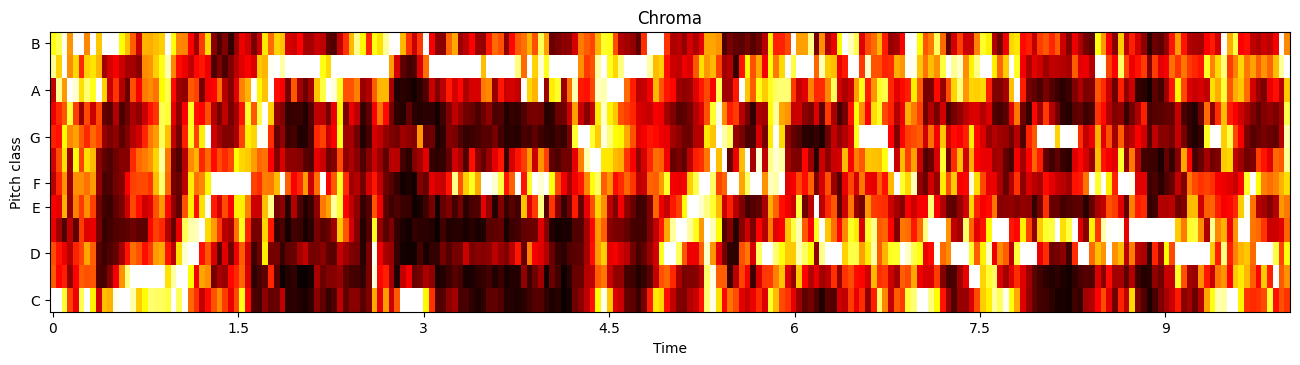

In [57]:
#Now you can access various chroma variant features as a method of chroma object
c_cqtp_query1 = audio1.chroma_cqt()
c_cqt_query2 = audio2.chroma_cqt()

display_chroma(c_cqt_query1, cmap="hot")
display_chroma(c_cqt_query2, cmap="hot")

#### Similarity matrix

In [69]:
# Compute cross recurrent plot from two chroma audio feature vectors as mentioned in [1]
sim_matrix = sims.cross_recurrent_plot(c_cqt_query1, c_cqt_query2)
sim_matrix

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

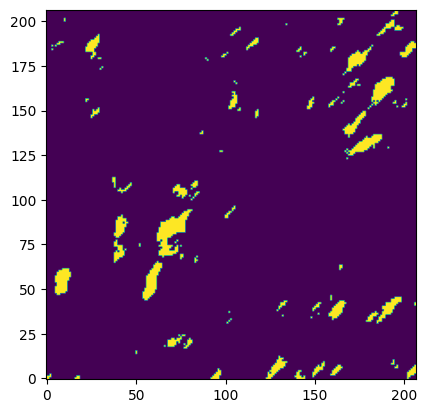

In [59]:
# Plot the cross recurrent plot
plt.imshow(sim_matrix, origin='lower')
plt.show()

In [60]:
#Computing qmax audio similarity measure (distance) as mentioned in [1]
qmax, cost_matrix = sims.qmax_measure(sim_matrix)

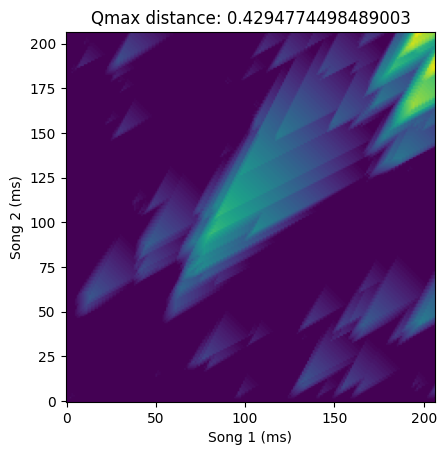

In [70]:
#Plot the qmax scoring matrix
plt.imshow(cost_matrix, origin='lower')
plt.title("Qmax distance: %s" % qmax)
plt.xlabel("Song 1 (ms)")
plt.ylabel("Song 2 (ms)")
plt.show()

### Key independence

The HCPC measure combined with dMax distance measure are recomended as the authors as Key (transposition) independent. 
Let's visualize that on an example:
Two identical melody tracks but in different Key were chosen. The dmax measure should be close to 0. 

== Audio vector of validation_data/koleda_C_Major.mp3 loaded with shape (1075968,) and sample rate 44100 ==
== Audio vector of validation_data/koleda_E_Major.mp3 loaded with shape (1075968,) and sample rate 44100 ==


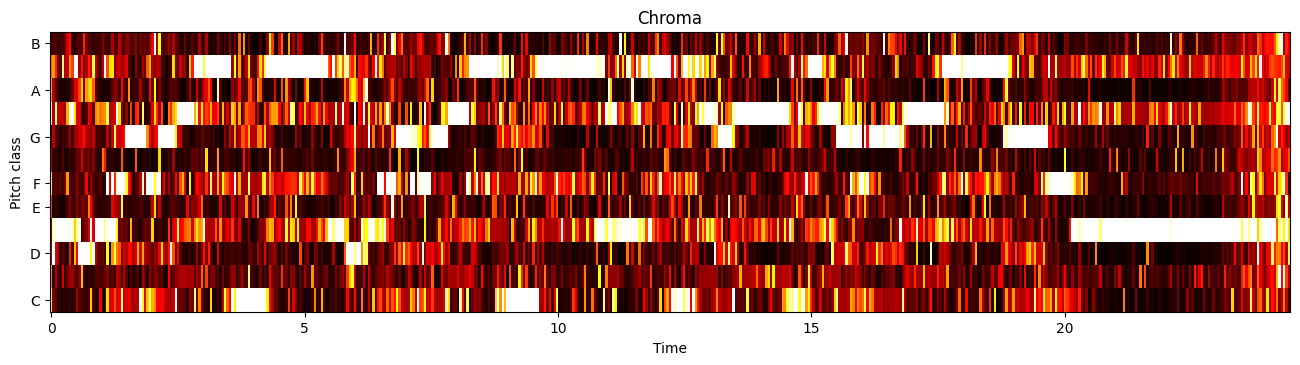

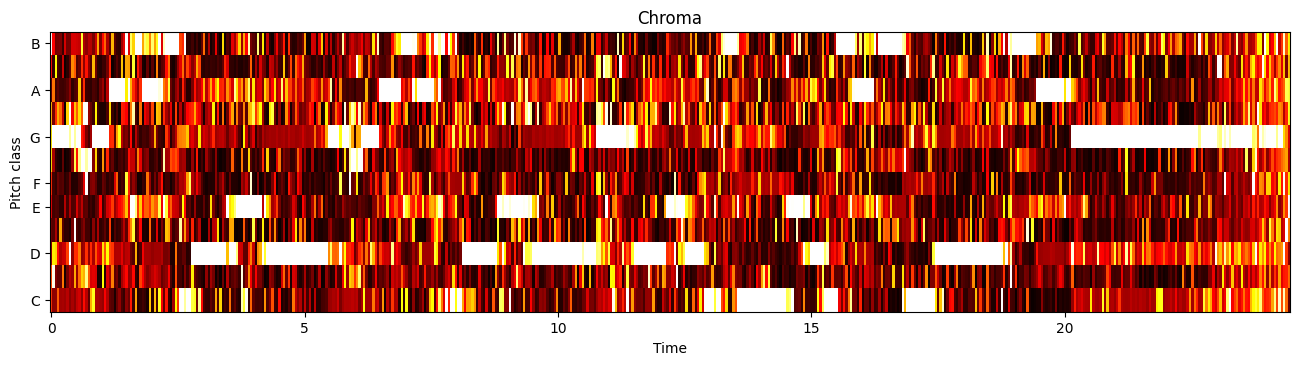

In [85]:
audio1_path = "validation_data/koleda_C_Major.mp3" 
audio2_path = "validation_data/koleda_E_Major.mp3" 

# Initiate the ChromaFeatures class 
audio1 = ChromaFeatures(audio_file=audio1_path, mono=True, sample_rate=44100) 
audio2 = ChromaFeatures(audio_file=audio2_path, mono=True, sample_rate=44100) 

#Now you can access various chroma variant features as a method of chroma object
c_hpcp_query1 = audio1.chroma_hpcp()
c_hpcp_query2 = audio2.chroma_hpcp()

display_chroma(c_hpcp_query1, cmap="hot")
display_chroma(c_hpcp_query2, cmap="hot")

In [80]:
# Compute cross recurrent plot from two chroma audio feature vectors as mentioned in [1]
sim_matrix = sims.cross_recurrent_plot(c_hpcp_query1, c_hpcp_query2)
sim_matrix

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [83]:
#Computing qmax audio similarity measure (distance) as mentioned in [1]
dmax, cost_matrix = sims.dmax_measure(sim_matrix)

dmax

0.03514998201309975